# Preparing Data

In [78]:
import pandas as pd
import numpy as np

# Charger le fichier CSV dans un DataFrame
dfs = []  # Liste pour stocker les DataFrames
dfs.append(pd.read_csv("updated_locations.csv"))  # Charger un DataFrame

dfs

# Accéder au DataFrame dans la liste (par exemple, dfs[0])
df = dfs[0]  # dfs est une liste, donc dfs[0] accède au premier DataFrame

# Supprimer les doublons en fonction de la colonne 'STN Code'
df_unique = df.drop_duplicates(subset=['STN Code'])

# Afficher le DataFrame sans doublons
print(df_unique)


      STN Code                        Name of Monitoring Location  \
0         1790                      PULICATE LAKE , NELLORE DIST.   
1         2353  KONDACHARLA-AAVA LAKE, PARAWADA PHARMA CITY, V...   
2         2205                       MER BEEL AT MADHABPUR, ASSAM   
3         2206                  DALONI BEEL NEAR JOGIGHOPA, ASSAM   
4         2557                       KAWAR LAKE, BEGUSARAI, BIHAR   
...        ...                                                ...   
1066      5050  VENNA CHERUVU, JEEDIMETLA, QUTUBULLAPUR, MEDCH...   
1067      5042  YELLAMMA CHERUVU, KUKATPALLY, MEDCHAL - MALKAGIRI   
1068      5031                   YERRA KUNTA, SHAIKPET, HYDERABAD   
1078      3437                                      BHEEMTAL LAKE   
1079      1362        NAINI LAKE AT NAINITAL (WATER INTAKE POINT)   

            State Name  Min Temperature  Max Temperature  \
0     ANDHRA \nPRADESH             27.0             28.0   
1     ANDHRA \nPRADESH             24.0            

In [79]:

#some entries in the pdf have - to represent a blank value so we must remove those as well
bad_vals = df_unique.apply(lambda x:x=="-").any(axis=1)
bad_idx = bad_vals.index[bad_vals]
df_unique = df_unique.drop(bad_idx)

#replace below detection level with 0
df_unique = df_unique.replace("BDL",0)

df_unique.reset_index(inplace=True,drop=True)
df_unique

,STN Code,Name of Monitoring Location,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,...,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform,lat,lon
0,1790,"PULICATE LAKE , NELLORE DIST.",ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,...,1.0,2.3,0.65,6.90,2.0,2.0,800.0,1600.0,13.695333,80.059293
1,2353,"KONDACHARLA-AAVA LAKE, PARAWADA PHARMA CITY, V...",ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,...,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0,17.603203,83.000845
2,2205,"MER BEEL AT MADHABPUR, ASSAM",ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,...,1.0,16.2,0.10,1.70,300.0,2000.0,360.0,6400.0,26.407384,93.255130
3,2206,"DALONI BEEL NEAR JOGIGHOPA, ASSAM",ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,...,0.9,2.8,0.10,1.40,300.0,1200.0,300.0,5300.0,26.407384,93.255130
4,2557,"KAWAR LAKE, BEGUSARAI, BIHAR",BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,...,2.1,2.8,0.00,0.00,7000.0,26000.0,15000.0,38000.0,25.512541,86.088339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,5050,"VENNA CHERUVU, JEEDIMETLA, QUTUBULLAPUR, MEDCH...",TELANGANA,27.0,30.0,0.3,3.1,7.1,7.8,1312.0,...,5.0,16.0,7.80,52.00,9.0,63.0,130.0,540.0,17.519687,78.446888
335,5042,"YELLAMMA CHERUVU, KUKATPALLY, MEDCHAL - MALKAGIRI",TELANGANA,27.0,28.0,0.3,3.0,7.0,8.1,1027.0,...,5.8,20.0,0.60,37.00,27.0,63.0,220.0,920.0,18.612131,79.368488
336,5031,"YERRA KUNTA, SHAIKPET, HYDERABAD",TELANGANA,22.0,29.0,0.3,3.8,7.2,8.0,740.0,...,4.0,19.0,0.90,8.60,2.0,57.0,220.0,920.0,17.806692,78.174147
337,3437,BHEEMTAL LAKE,UTTARAKHAND,11.0,23.0,7.4,9.0,7.2,8.0,160.0,...,1.0,1.6,0.32,0.37,70.0,170.0,210.0,540.0,30.041738,79.089691


In [80]:
#Required Columns
L = [
  "Min Temperature","Max Temperature","Min Dissolved Oxygen","Max Dissolved Oxygen",
  "Min pH","Max pH","Min Conductivity","Max Conductivity","Min BOD","Max BOD",
  "Min Nitrate N + Nitrite N","Max Nitrate N + Nitrite N","Min Fecal Coliform",
  "Max Fecal Coliform","Min Total Coliform","Max Total Coliform","lat","lon"
]
df_unique[L] = df_unique[L].apply(pd.to_numeric)

#dropping redundant columns
df_unique = df_unique.drop(columns=["Name of Monitoring Location"])
df_unique = df_unique.astype({"STN Code":int})
df_unique

,STN Code,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform,lat,lon
0,1790,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.90,2.0,2.0,800.0,1600.0,13.695333,80.059293
1,2353,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0,17.603203,83.000845
2,2205,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.10,1.70,300.0,2000.0,360.0,6400.0,26.407384,93.255130
3,2206,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.10,1.40,300.0,1200.0,300.0,5300.0,26.407384,93.255130
4,2557,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.00,0.00,7000.0,26000.0,15000.0,38000.0,25.512541,86.088339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,5050,TELANGANA,27.0,30.0,0.3,3.1,7.1,7.8,1312.0,1604.0,5.0,16.0,7.80,52.00,9.0,63.0,130.0,540.0,17.519687,78.446888
335,5042,TELANGANA,27.0,28.0,0.3,3.0,7.0,8.1,1027.0,2250.0,5.8,20.0,0.60,37.00,27.0,63.0,220.0,920.0,18.612131,79.368488
336,5031,TELANGANA,22.0,29.0,0.3,3.8,7.2,8.0,740.0,1352.0,4.0,19.0,0.90,8.60,2.0,57.0,220.0,920.0,17.806692,78.174147
337,3437,UTTARAKHAND,11.0,23.0,7.4,9.0,7.2,8.0,160.0,210.0,1.0,1.6,0.32,0.37,70.0,170.0,210.0,540.0,30.041738,79.089691


In [81]:
state_counts = df_unique["State Name"].value_counts()
print(state_counts)


State Name
TELANGANA             82
KARNATAKA             77
MADHYA PRADESH        22
GUJARAT               20
RAJASTHAN             19
ASSAM                 17
KERALA                16
WEST BENGAL           13
GOA                    9
TRIPURA                8
TAMIL NADU             8
ODISHA                 7
MEGHALAYA              7
HIMACHAL \nPRADESH     5
MANIPUR                5
PUDUCHERRY             3
ANDHRA \nPRADESH       3
BIHAR                  3
DELHI                  3
PUNJAB                 3
HARYANA                2
UTTAR PRADESH          2
UTTARAKHAND            2
CHANDIGARH             1
CHHATTISGARH           1
MADHYA \nPRADESH       1
Name: count, dtype: int64


# Calculating WQI

To calculate water quality index, we can use the Weighted Arithmetic Mean method

$$ WQI = \frac{\sum q_iw_i}{\sum w_i} $$

Here, $w_i$ represents unit weight of ith parameter towards overall water quality and $q_i$ is the quality estimate of the ith parameter. They can be calculated as follows

$$ q_i = \frac{V_i - V_{ideal} }{S_i - V_{ideal}} * 100 $$

$$ w_i = \frac{K}{S_i} $$



In [82]:
stv = np.array([10,8.5,1000,5,45,100,1000])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])
print(w_n)

[0.22130294 0.2603564  0.00221303 0.44260588 0.04917843 0.02213029
 0.00221303]


Using the table, we can calculate the unit weights,

| Parameter | Unit weights ($w_i$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 0.2213 |
| pH | 0.2603 |
| Conductivity (µS/cm) |  0.0022 |
| Biological Oxygen Demand (mg/L) | 0.4426 |
| Nitrate (mg/L) | 0.04917 |
| Fecal Coliform (per 100 mL) | 0.02213 |
| Total Coliform (per 100 mL) | 0.00221 |

Ideal Values in pure water are given by,

| Parameter | Ideal Value ($V_{ideal}$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 14.6 |
| pH | 7 |
| Conductivity (µS/cm) | 0 |
| Biological Oxygen Demand (mg/L) | 0 |
| Nitrate (mg/L) | 0 |
| Fecal Coliform (per 100 mL) | 0 |
| Total Coliform (per 100 mL) | 0 |

In [84]:
idv = np.array([14.6,7,0,0,0,0,0])
diff = stv-idv

def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)

example_row = np.array([6.8,7.8,1179,4.6,3.56,23,240])
calculate_wqi(example_row)

np.float64(93.34277805867758)

# Interpolating Average Statistics

Each of the columns of the data provided has the min and max values for each parameter in a lake.
In order to calculate the WQI for a lake , we need to estimate the average value for each parameter from the min and max values.

Assuming that these features are roughly normally distributed, we can then say that the average(median) value for the parameter would be midway between the min and the max value. For example, when considering pH to be distributed normally over all the samples, we could say :

$$ pH_{average} \approx \frac{(pH_{min} + pH_{max})}{2} $$

For features like pH, Dissolved Oxygen, Conductivity and Nitrates, this approximation does give close results to the actual mean in other lakes where annual data has been recorded.

In [85]:
def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)

df_a = pd.DataFrame()
df_a["Dissolved Oxygen"] = avg(df_unique["Min Dissolved Oxygen"],df_unique["Max Dissolved Oxygen"])
df_a["pH"] = avg(df_unique["Min pH"],df_unique["Max pH"])
df_a["Conductivity"] = avg(df_unique["Min Conductivity"],df_unique["Max Conductivity"])
df_a["BOD"] = avg(df_unique["Min BOD"],df_unique["Max BOD"])
df_a["Nitrate N + Nitrite N"] = avg(df_unique["Min Nitrate N + Nitrite N"],df_unique["Max Nitrate N + Nitrite N"])
df_a["Fecal Coliform"] = avg(df_unique["Min Fecal Coliform"],df_unique["Max Fecal Coliform"])
df_a["Total Coliform"] = avg(df_unique["Min Total Coliform"],df_unique["Max Total Coliform"])
df_a

,Dissolved Oxygen,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform
0,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0
1,6.35,7.65,815.5,1.80,2.260,20.0,1375.0
2,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0
3,5.55,7.20,103.5,1.85,0.750,750.0,2800.0
4,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0
...,...,...,...,...,...,...,...
334,1.70,7.45,1458.0,10.50,29.900,36.0,335.0
335,1.65,7.55,1638.5,12.90,18.800,45.0,570.0
336,2.05,7.60,1046.0,11.50,4.750,29.5,570.0
337,8.20,7.60,185.0,1.30,0.345,120.0,375.0


# Classification of water bodies

In [86]:
wqi = df_a.apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi
df_a = df_a[df_a["WQI"]>=0]
df_a.dropna()
df_a.insert(0,"STN Code",df_unique["STN Code"])
df_a

,STN Code,Dissolved Oxygen,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform,WQI
0,1790,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,88.277923
1,2353,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,68.080478
2,2205,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,138.790236
3,2206,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,80.709022
4,2557,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,440.315367
...,...,...,...,...,...,...,...,...,...
334,5050,1.70,7.45,1458.0,10.50,29.900,36.0,335.0,167.280088
335,5042,1.65,7.55,1638.5,12.90,18.800,45.0,570.0,189.579483
336,5031,2.05,7.60,1046.0,11.50,4.750,29.5,570.0,174.120398
337,3437,8.20,7.60,185.0,1.30,0.345,120.0,375.0,55.529251


In [87]:
counts = [0]*5
counts[0] = len(df_a[df_a["WQI"]<50])
counts[1] = len(df_a[(df_a["WQI"]>=50) & (df_a["WQI"]<100)])
counts[2] = len(df_a[(df_a["WQI"]>=100) & (df_a["WQI"]<200)])
counts[3] = len(df_a[(df_a["WQI"]>=200) & (df_a["WQI"]<300)])
counts[4] = len(df_a[df_a["WQI"]>=300])
print(counts)

[5, 110, 84, 32, 106]


| WQI | Classification | Frequency |
| :-: | :-: | :-: |
| < 50 | Excellent | 31 |
| 50 - 100 | Good | 461 |
| 100 - 200 | Poor | 248 |
| 200 - 300 | Very Poor | 102 |
| > 300 | Unsuitable for Drinking | 248 |

# Boxplots

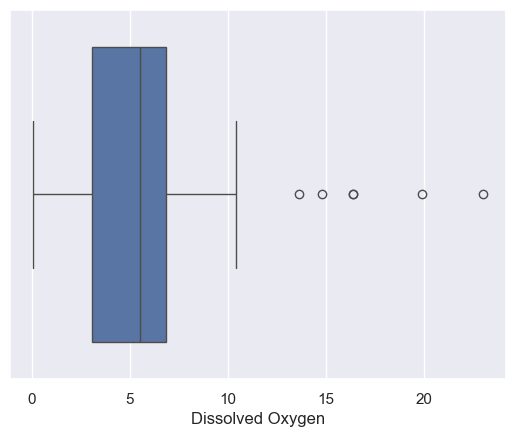

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

def boxplot(feature):
    sns.boxplot(data=df_a,x=feature,orient='h')

boxplot("Dissolved Oxygen")

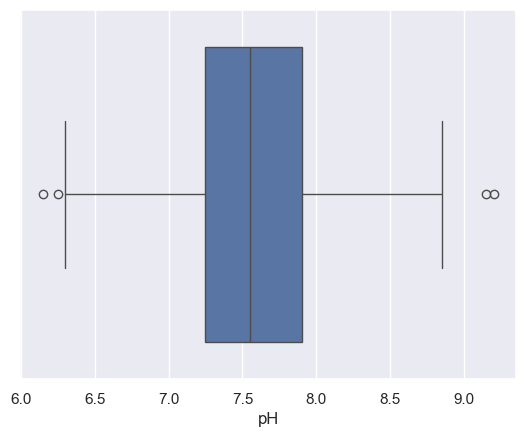

In [89]:
boxplot("pH")

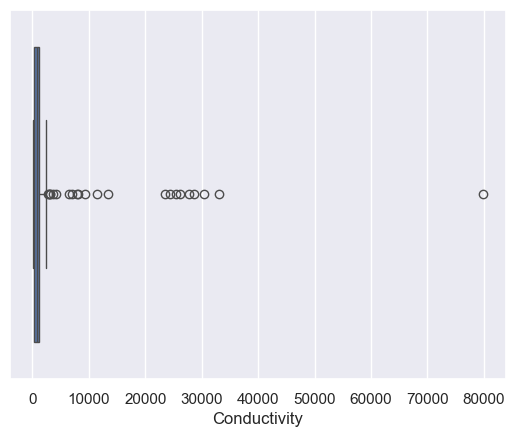

In [90]:
boxplot("Conductivity")

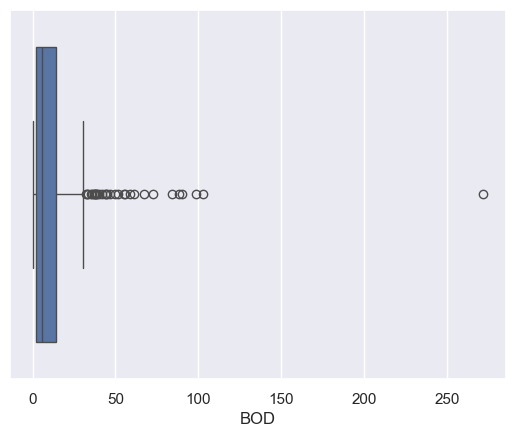

In [91]:
boxplot("BOD")

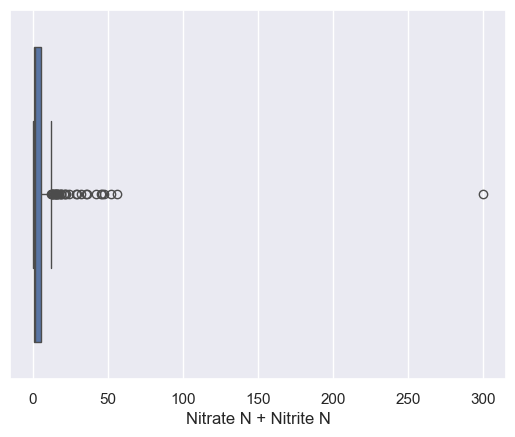

In [92]:
boxplot("Nitrate N + Nitrite N")

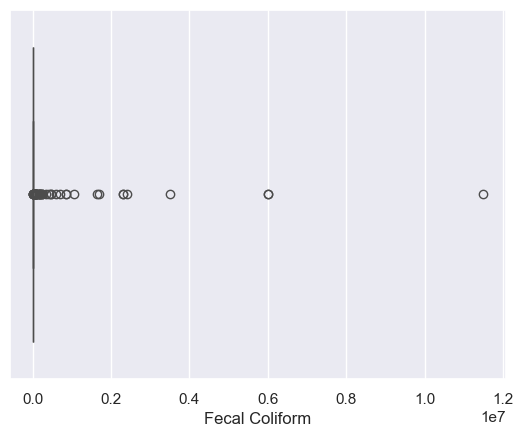

In [93]:
boxplot("Fecal Coliform")

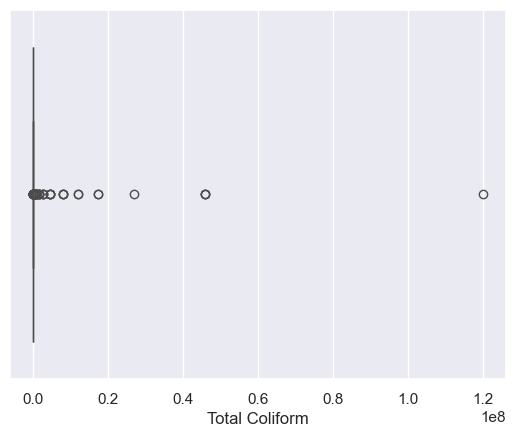

In [94]:
boxplot("Total Coliform")

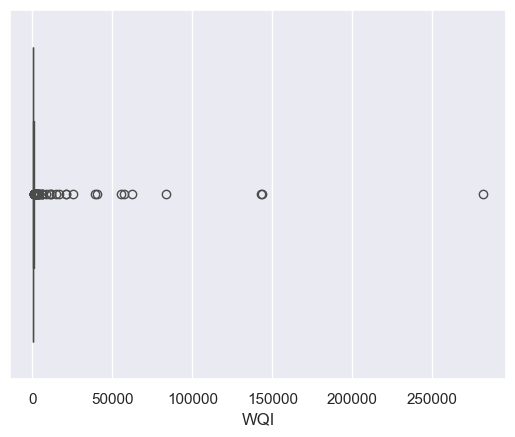

In [95]:
boxplot("WQI")

We can see that there is an extreme right skew to the data of almost all parameters, with significant outliers. This leads to nonsensical values for water quality index. Hence, we remove these extreme outliers (roughly 7.5% of the data) in order to improve the generalizability of the model 

In [96]:
df_a = df_a[df_a["WQI"]<2000]
df_a

,STN Code,Dissolved Oxygen,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform,WQI
0,1790,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,88.277923
1,2353,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,68.080478
2,2205,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,138.790236
3,2206,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,80.709022
4,2557,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,440.315367
...,...,...,...,...,...,...,...,...,...
334,5050,1.70,7.45,1458.0,10.50,29.900,36.0,335.0,167.280088
335,5042,1.65,7.55,1638.5,12.90,18.800,45.0,570.0,189.579483
336,5031,2.05,7.60,1046.0,11.50,4.750,29.5,570.0,174.120398
337,3437,8.20,7.60,185.0,1.30,0.345,120.0,375.0,55.529251


# Predicting WQI with lesser parameters

## Linear Regression

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ncols = ["Dissolved Oxygen","pH","Conductivity","BOD","Nitrate N + Nitrite N","Fecal Coliform","Total Coliform"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Avant normalisation
print(X_train["pH"].head(10))

s = MinMaxScaler()
X_train_ = s.fit_transform(X_train)
X_test_ = s.transform(X_test)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

# Après normalisation
print(X_train_[:, ncols.index("pH")][:10])

print(sdf)

sdf.to_csv('combined_lake.csv', index=False)

322    7.75
105    8.10
268    6.50
68     8.00
37     8.35
21     7.70
209    8.45
251    7.05
248    7.50
64     7.80
Name: pH, dtype: float64
[0.52459016 0.63934426 0.1147541  0.60655738 0.72131148 0.50819672
 0.75409836 0.29508197 0.44262295 0.54098361]
     Dissolved Oxygen        pH  Conductivity       BOD  \
0            0.086957  0.524590      0.008365  0.202976   
1            0.230435  0.639344      0.006419  0.018452   
2            0.263043  0.114754      0.013502  0.047619   
3            0.304348  0.606557      0.005049  0.020238   
4            0.302174  0.721311      0.006457  0.065476   
..                ...       ...           ...       ...   
237          0.119565  0.639344      0.081126  0.589286   
238          0.173913  0.622951      0.004486  0.041667   
239          0.230435  0.655738      0.005306  0.214286   
240          0.047826  0.442623      0.014347  0.226190   
241          0.228261  0.622951      0.008572  0.051786   

     Nitrate N + Nitrite N  Fecal

<Axes: >

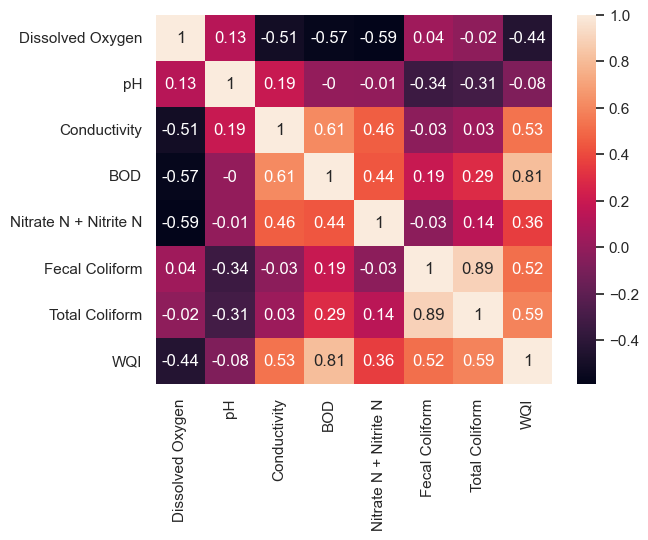

In [98]:
cmatrix = sdf.corr(method='spearman').round(2)
sns.heatmap(cmatrix,annot=True)

In [99]:
selected_features = [2,3,4,5,6] # BOD,Fecal Coliform,Dissolved Oxygen
del_ft = [0,1]
X_train_ = np.delete(X_train_,del_ft,axis=1)
X_test_ = np.delete(X_test_,del_ft,axis=1)
print(X_train_.shape)

(242, 5)


In [100]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# Ajuster le modèle LassoCV
reg = LassoCV(cv=5, random_state=10).fit(X_train_, y_train)

# Faire des prédictions
y_hat = reg.predict(X_test_)

# Calculer les métriques de performance
print(f"RMSE: {mean_squared_error(y_test, y_hat, squared=False)}")
print(f"R2 : {r2_score(y_test, y_hat)}")


RMSE: 13.497126150134502
R2 : 0.998599309324624


c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


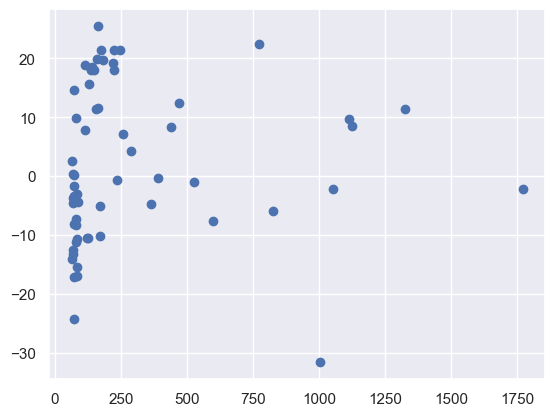

In [101]:
residuals = y_test-y_hat
plt.scatter(y_hat,residuals)
plt.show()

In [102]:
# Identifier les valeurs où les résidus sont très élevés
outliers = y_test[(residuals < -20) | (residuals > 20)]
print(outliers)

170    796.179775
323    187.673960
131    269.054535
325    196.200610
182    973.216293
59      49.974877
124    246.362079
Name: WQI, dtype: float64


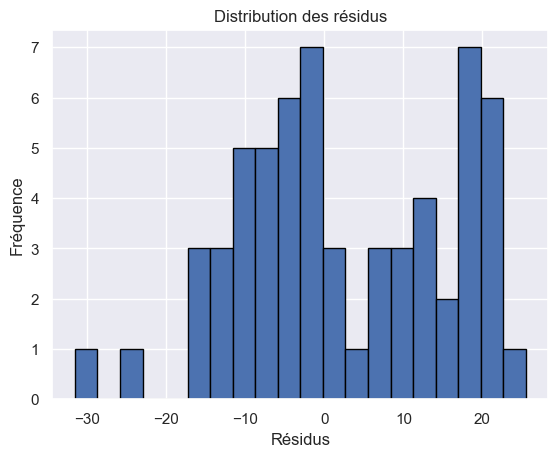

In [103]:
# Histogramme des résidus
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

In [104]:
print(reg.coef_)

[   5.75552849  769.44890513    9.16360702 1719.68258624  120.32318858]


In [105]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso

# Définir KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

# Instancier le modèle
lasso = Lasso(alpha=reg.alpha_)  # Utilisez la régularisation trouvée par LassoCV

# Effectuer la validation croisée
scores = cross_val_score(lasso, X_train_, y_train, cv=kfold, scoring='r2')

print(f"Scores R2 pour chaque fold : {scores}")
print(f"R2 moyen : {scores.mean():.3f}")
print(f"Écart-type des R2 : {scores.std():.3f}")

Scores R2 pour chaque fold : [0.99854528 0.99545034 0.99858494 0.99851576 0.99865742]
R2 moyen : 0.998
Écart-type des R2 : 0.001


In [106]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error

# Créer une métrique RMSE personnalisée
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Validation croisée avec plusieurs métriques
results = cross_validate(lasso, X_train_, y_train, cv=kfold,
                         scoring={'r2': 'r2', 'rmse': rmse_scorer},
                         return_train_score=True)

print("R2 moyen :", results['test_r2'].mean())
print("RMSE moyen :", results['test_rmse'].mean())


R2 moyen : 0.9979507474803663
RMSE moyen : 14.705886366052718


c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

Accuracy = 0.9508196721311475


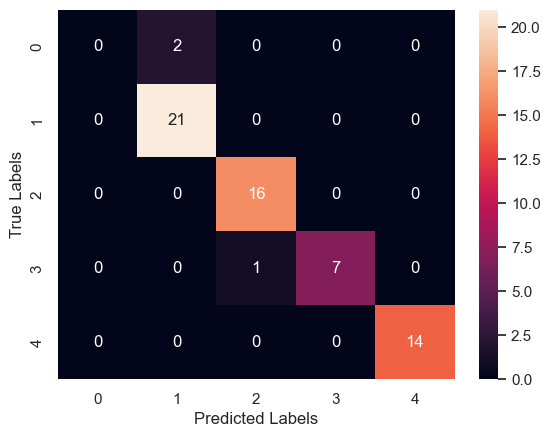

In [107]:
#testing classification accuracy
from sklearn.metrics import accuracy_score,confusion_matrix

def classify(y):
    y_c = np.zeros_like(y,dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

y_c = classify(y_test.to_numpy())
y_c_hat = classify(y_hat)    
    
print(f'Accuracy = {accuracy_score(y_c,y_c_hat)}')
cm = confusion_matrix(y_c,y_c_hat)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

## GradientBoostingRegressor

In [108]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Style des graphiques
sns.set(style="whitegrid")

ncols = ["Dissolved Oxygen","pH","Conductivity","BOD","Nitrate N + Nitrite N","Fecal Coliform","Total Coliform"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Initialisation des modèles
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)  # Modèle Gradient Boosting

# Entraînement des modèles
gb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test)


=== Performance du modèle Gradient Boosting ===
R² : 0.952
RMSE : 78.663


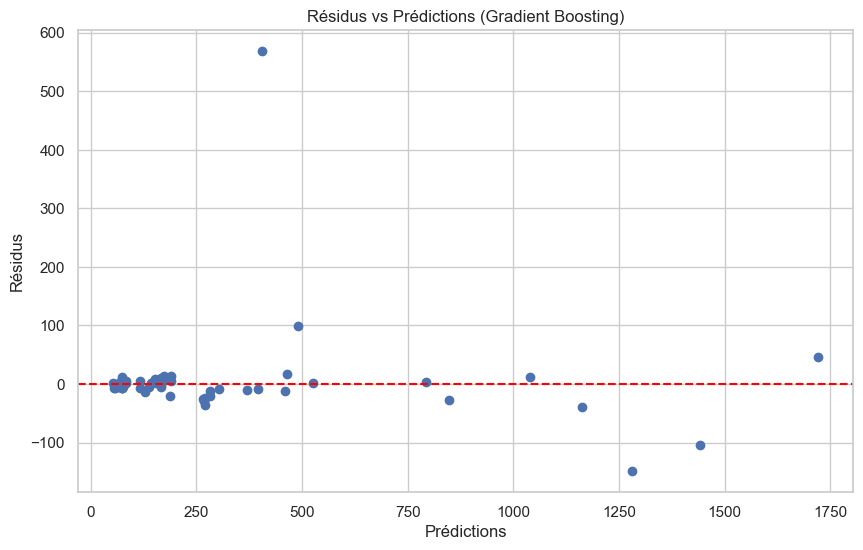

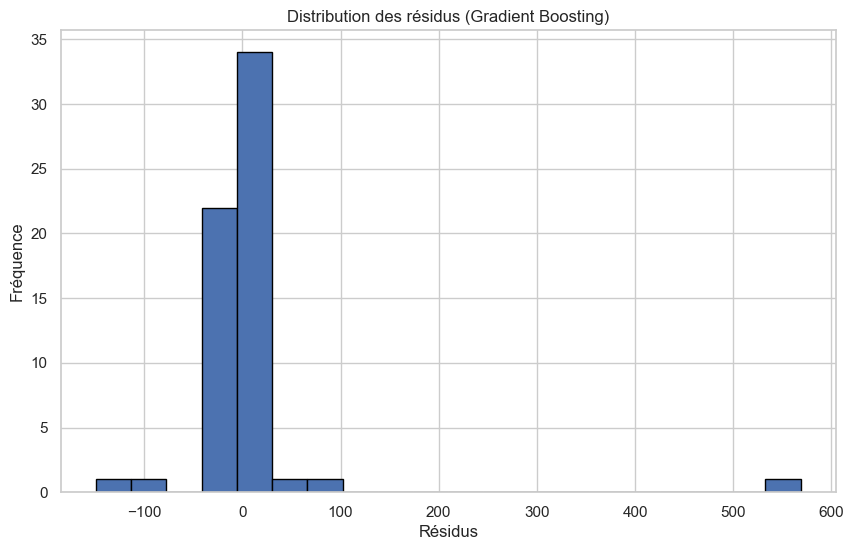

In [109]:
print("\n=== Performance du modèle Gradient Boosting ===")
print(f"R² : {r2_score(y_test, y_pred_gb):.3f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.3f}")

# Visualisation des résidus pour Gradient Boosting
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb, residuals_gb)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Prédictions (Gradient Boosting)")
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(residuals_gb, bins=20, edgecolor="black")
plt.title("Distribution des résidus (Gradient Boosting)")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function


=== Résultats de la validation croisée ===
R² moyen : 0.9571698734056234
RMSE moyen : 64.46339511455253

=== Performance de classification ===
Accuracy : 0.934


c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


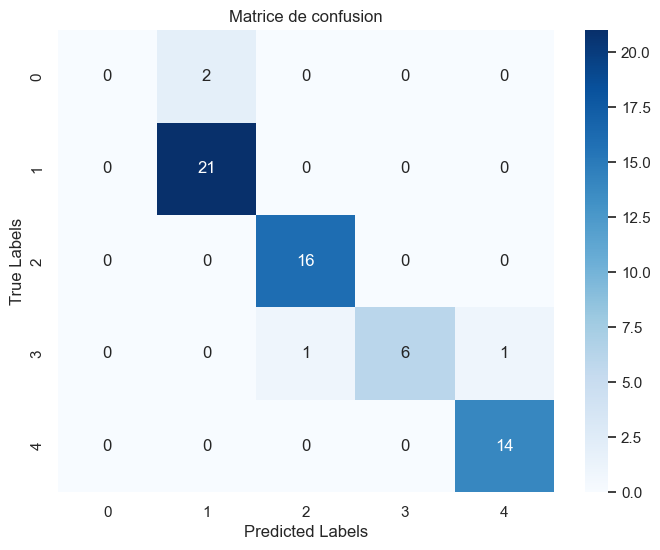

In [116]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Validation croisée pour Random Forest
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

# Créer une métrique RMSE personnalisée
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Validation croisée avec plusieurs métriques
results = cross_validate(gb_model, X_train, y_train, cv=kfold,
                         scoring={'r2': 'r2', 'rmse': rmse_scorer},
                         return_train_score=True)

print("\n=== Résultats de la validation croisée ===")
print("R² moyen :", results['test_r2'].mean())
print("RMSE moyen :", results['test_rmse'].mean())

# Conversion des valeurs pour une tâche de classification
def classify(y):
    y_c = np.zeros_like(y, dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

# Classification des valeurs réelles et prédites
y_c = classify(y_test.to_numpy())
y_c_hat = classify(y_pred_gb)

# Évaluation des performances de classification
print("\n=== Performance de classification ===")
print(f"Accuracy : {accuracy_score(y_c, y_c_hat):.3f}")
cm = confusion_matrix(y_c, y_c_hat)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Matrice de confusion")
plt.show()

## Random Forest

In [110]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Style des graphiques
sns.set(style="whitegrid")

ncols = ["Dissolved Oxygen","pH","Conductivity","BOD","Nitrate N + Nitrite N","Fecal Coliform","Total Coliform"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Initialisation des modèles
rf_model = RandomForestRegressor(random_state=42, n_estimators=300)  # Modèle Random Forest

# Entraînement des modèles
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

In [111]:
# Créer un DataFrame avec les valeurs réelles et prédites (par exemple, avec Random Forest)
results_df = pd.DataFrame({
    "WQI Réel": y_test.values,
    "WQI Prédit (Random Forest)": y_pred_rf,
})

# Ajouter l'index des prédictions
results_df.reset_index(drop=True, inplace=True)

# Affichage du DataFrame pour vérification
print(results_df)

       WQI Réel  WQI Prédit (Random Forest)
0   1050.055508                 1075.145345
1     68.449246                   79.083308
2     81.508895                   78.825800
3    203.789321                  196.759154
4     70.096323                   81.302899
..          ...                         ...
56   156.062756                  150.764998
57   246.362079                  251.163951
58    74.979642                   83.125118
59    55.529251                   53.010729
60   165.382904                  163.942717

[61 rows x 2 columns]


In [112]:
# Évaluation des performances
print("=== Performance du modèle Random Forest ===")
print(f"R² : {r2_score(y_test, y_pred_rf):.3f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}")

=== Performance du modèle Random Forest ===
R² : 0.940
RMSE : 88.661


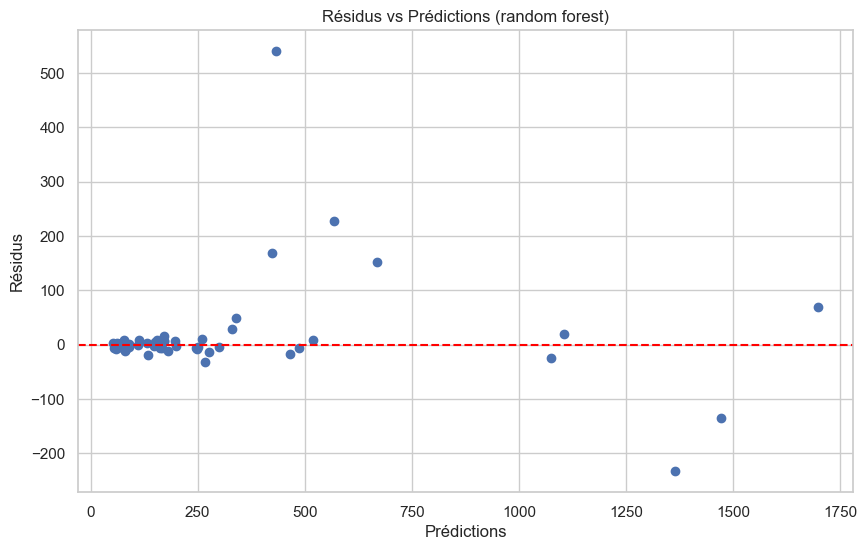

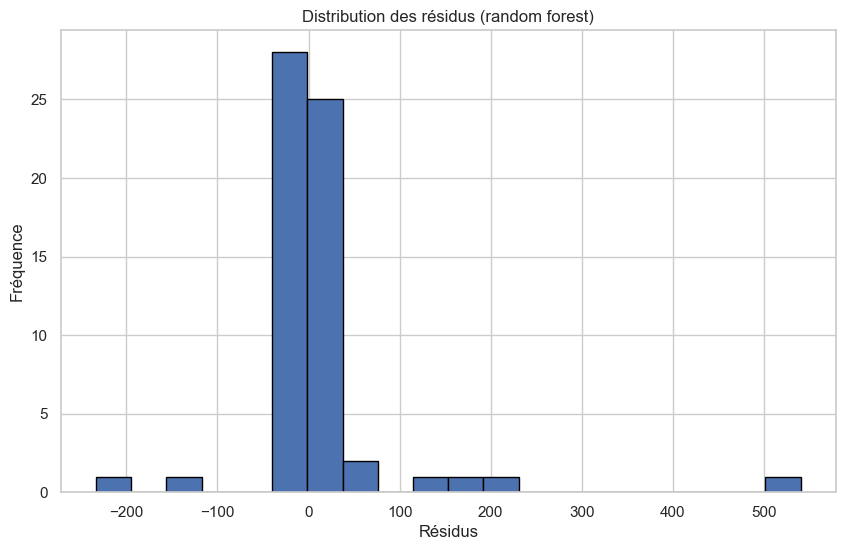

In [113]:
# Visualisation des résidus pour Random Forest
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Prédictions (random forest)")
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(residuals_rf, bins=20, edgecolor="black")
plt.title("Distribution des résidus (random forest)")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

In [114]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV pour Random Forest
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

print("Meilleurs paramètres pour Random Forest :", grid_rf.best_params_)

# Réentraîner avec les meilleurs paramètres
best_rf_model = grid_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print("R² (Random Forest optimisé):", r2_score(y_test, y_pred_best_rf))

Meilleurs paramètres pour Random Forest : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
R² (Random Forest optimisé): 0.9393098272757862


c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function


=== Résultats de la validation croisée ===
R² moyen : 0.9505927414725075
RMSE moyen : 71.98025701512339

=== Performance de classification ===
Accuracy : 0.951


c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\anaconda\envs\MLOPs\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


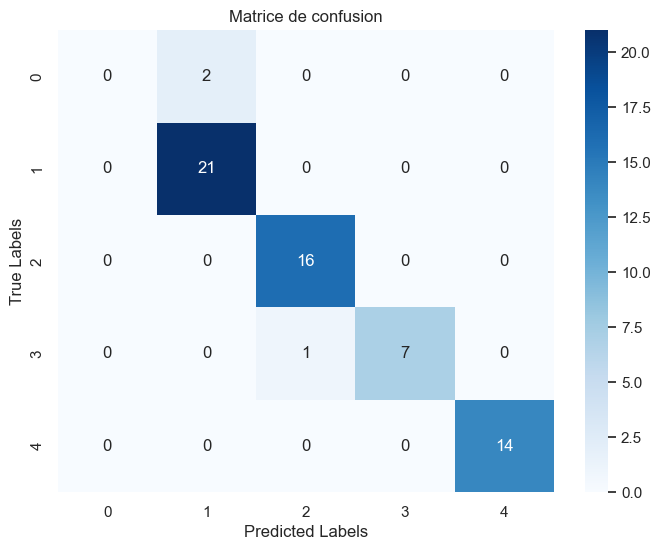

In [115]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Validation croisée pour Random Forest
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

# Créer une métrique RMSE personnalisée
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Validation croisée avec plusieurs métriques
results = cross_validate(rf_model, X_train, y_train, cv=kfold,
                         scoring={'r2': 'r2', 'rmse': rmse_scorer},
                         return_train_score=True)

print("\n=== Résultats de la validation croisée ===")
print("R² moyen :", results['test_r2'].mean())
print("RMSE moyen :", results['test_rmse'].mean())

# Conversion des valeurs pour une tâche de classification
def classify(y):
    y_c = np.zeros_like(y, dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

# Classification des valeurs réelles et prédites
y_c = classify(y_test.to_numpy())
y_c_hat = classify(y_pred_rf)

# Évaluation des performances de classification
print("\n=== Performance de classification ===")
print(f"Accuracy : {accuracy_score(y_c, y_c_hat):.3f}")
cm = confusion_matrix(y_c, y_c_hat)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Matrice de confusion")
plt.show()